PHASE 1: ENVIRONMENT SETUP & DATA EXPLORATION

Gerekli tüm kütüphaneleri import ediyoruz.

In [1]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter


CSV dosyasını DataFrame çeviriyoruz

In [2]:
df = pd.read_csv("archive/spam.csv", encoding="latin-1")

Tablodaki satır ve sütun sayısını df.shape ile öğreniyoruz.
İlk 5 satırı df.head() ile alıyoruz

In [3]:
print("Dataset shape: ", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape:  (5572, 5)

First 5 rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
print("\nColumn Information")
print(df.info())


Column Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [5]:
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


Unnamed: 2, Unnamed: 3, Unnamed: 4 sütunlarında çok fazla boş değer var. Gereksiz sütunları df.drop() ile temizliyoruz. 
v1 ve v2 gibi sütun adlarını da anlamlı olarak df.rename() ile yeniden adlandırıyoruz.

In [6]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1": "label", "v2": "message"})

print("\nClean Dataset:")
print(df.head())


Clean Dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Ham ve Spam olarak kaç tane verimiz olduğunu ve yüzdelik olarak dağılımını alıyoruz.

In [7]:
# Ham ve Spam Dağılımı (Class Distribution)
print("\nClass Distribution:")
print(df["label"].value_counts())
print(df["label"].value_counts(normalize=True)*100)



Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


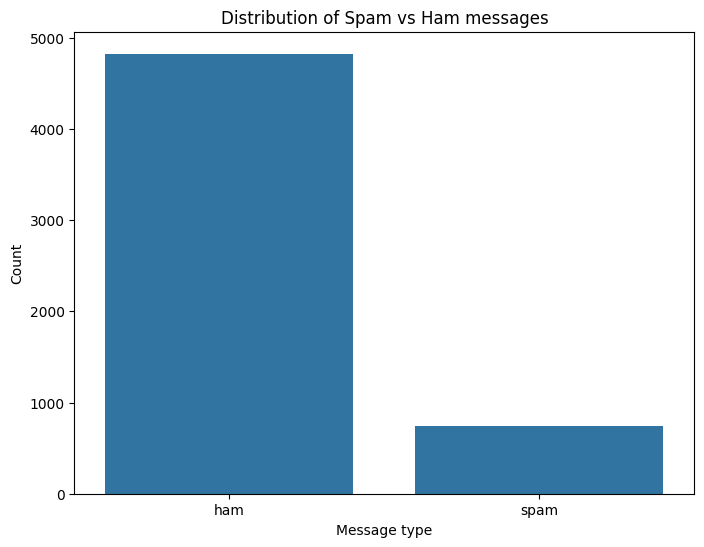

In [8]:
# Görselleştirelim
plt.figure(figsize=(8,6))
sns.countplot(x="label", data=df)

plt.title("Distribution of Spam vs Ham messages")
plt.xlabel("Message type")
plt.ylabel("Count")
plt.show()

In [9]:
# Spam ve Ham mesajların uzunluğunu bir sütun olarak ekleyelim
df["length"] = df["message"].apply(len)
print("\nMessage length statistics:")
print(df.groupby("label")["length"].describe())

# mesela ham mesajların ortalama uzunlugu 71 iken spamların ortalama uzunlugu 138


Message length statistics:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0


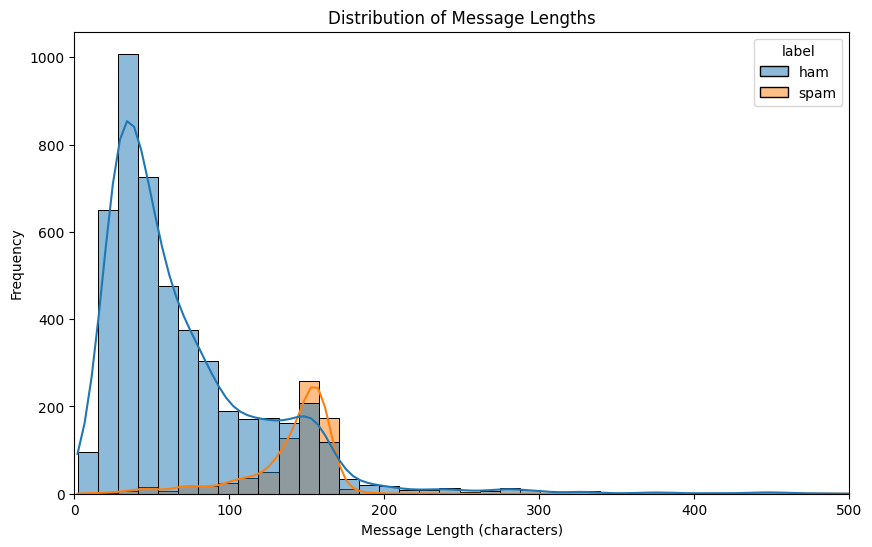

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="length", hue="label", bins=70, kde=True)

plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.show()

In [11]:
# Spam ve Ham mail örnekleri karşılaştıralım
print("\nExample of Ham messages:")
print(df[df["label"] == "ham"].head(3)["message"].values)

print("\nExample of Spam messages:")
print(df[df["label"] == "spam"].head(3)["message"].values)


Example of Ham messages:
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 'U dun say so early hor... U c already then say...']

Example of Spam messages:
["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']


Model eğitimi için spam olanları 1 ham olanları 0 olarak değerlendiriyoruz ve label_num adında yeni sütunda tutuyoruz.

In [12]:
df["label_num"] = df["label"].map({"spam": 1, "ham": 0})
print(df)

     label                                            message  length  \
0      ham  Go until jurong point, crazy.. Available only ...     111   
1      ham                      Ok lar... Joking wif u oni...      29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155   
3      ham  U dun say so early hor... U c already then say...      49   
4      ham  Nah I don't think he goes to usf, he lives aro...      61   
...    ...                                                ...     ...   
5567  spam  This is the 2nd time we have tried 2 contact u...     161   
5568   ham              Will Ì_ b going to esplanade fr home?      37   
5569   ham  Pity, * was in mood for that. So...any other s...      57   
5570   ham  The guy did some bitching but I acted like i'd...     125   
5571   ham                         Rofl. Its true to its name      26   

      label_num  
0             0  
1             0  
2             1  
3             0  
4             0  
...         ...

PHASE 2: TEXT PREPROCESSING

Metnin hepsini küçük harf yapıyoruz. Noktalama işaretlerini kaldırıyoruz. Sayıları kaldırıyoruz. En son olarak kelimelere ayırıyoruz.

In [13]:
def tokenize_text(message):
    message = message.lower()
    message = re.sub(f"[{string.punctuation}]", " ", message)
    message = re.sub(r"\d+", "", message)

    tokens = message.split()
    return tokens


Anlam bakımından çok sık geçen ve genelde analizde önemsiz sayılan kelimelere stop words deriz.

In [14]:
STOP_WORDS = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', 'should', 'now'
]

def remove_stopwords(tokens):
    return [word for word in tokens if word not in STOP_WORDS]

Örnek bir metin ile test

In [15]:
sample_message = "Hello! This is a sample message with some number 123. Is it working?"
tokens = tokenize_text(sample_message)
filtered_tokens = remove_stopwords(tokens)

print("\nPreprocessing example:")
print("Original message: ", sample_message)
print("After tokenization: ", tokens)
print("After stopword removal: ", filtered_tokens)


Preprocessing example:
Original message:  Hello! This is a sample message with some number 123. Is it working?
After tokenization:  ['hello', 'this', 'is', 'a', 'sample', 'message', 'with', 'some', 'number', 'is', 'it', 'working']
After stopword removal:  ['hello', 'sample', 'message', 'number', 'working']


Veri setimizdeki (tablodaki) message sütunundaki içerikleri tokenlere ayırıyoruz ve tokens sütununa ekleyip tabloya sütun olarak ekliyoruz. Tokens sütunundakileri anlamsız kelimeleri (stopwords) kaldırıp filtered_tokens sütunu oluşturup tabloya yeni sütun olarak tutuyoruz.

In [16]:
df["tokens"] = df["message"].apply(tokenize_text)
df["filtered_tokens"] = df["tokens"].apply(remove_stopwords)

print("\nExample of preprocessed messages:")
for i in range(3):
    print(f"Original: {df["message"].iloc[i]}")
    print(f"Processed: {df["filtered_tokens"].iloc[i]}")
    print()


Example of preprocessed messages:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Processed: ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']

Original: Ok lar... Joking wif u oni...
Processed: ['ok', 'lar', 'joking', 'wif', 'u', 'oni']

Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Processed: ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']



Genel bir sözlük oluşturacağız. Tekrar eden kelimeleri kaldırıp tüm kelimeleri içeren eşsiz sözlük yapacağız.

set() fonksiyonu ile "tekrar eden öğeleri kaldırıyoruz", "sırasızdır, elemanların yeri yoktur"

Counter() bir listede, kümede bir elemanın kaç defa geçtiğini çıktı olarak verir yani kısaca frekansı diyebiliriz listedeki elemanların.

In [17]:
# yardımcı fonksiyon (all unique words accross all messages)
def create_vocabulary(all_filtered_tokens):
    vocabulary = set()
    for tokens in all_filtered_tokens:
        vocabulary.update(tokens)

    return vocabulary

# sözlüğü oluşturuyoruz
vocabulary = create_vocabulary(df["filtered_tokens"])
print(f"Vocabulary size: {len(vocabulary)} unique words")

# teste sokalım
print("\nSample of vocabulary words: ")
print(list(vocabulary)[:20])

all_words = []
for tokens in df["filtered_tokens"]:
    all_words.extend(tokens)

word_freq = Counter(all_words)
print("\nMost common words in the dataset: ")
print(word_freq.most_common(20))



Vocabulary size: 7828 unique words

Sample of vocabulary words: 
['archive', 'consider', 'trouble', 'becomes', 'joy', 'invitation', 'limping', 'horny', 'simulate', 'haf', 'twelve', 'xxsp', 'neck', 'dlf', 'havent', 'leh', 'billion', 'gage', 'greatly', 'ldnwarw']

Most common words in the dataset: 
[('u', 1205), ('call', 593), ('m', 436), ('get', 394), ('ur', 381), ('gt', 318), ('lt', 316), ('å£', 298), ('ok', 292), ('free', 286), ('go', 284), ('ll', 263), ('know', 261), ('like', 245), ('good', 245), ('got', 238), ('day', 233), ('come', 229), ('time', 220), ('love', 209)]


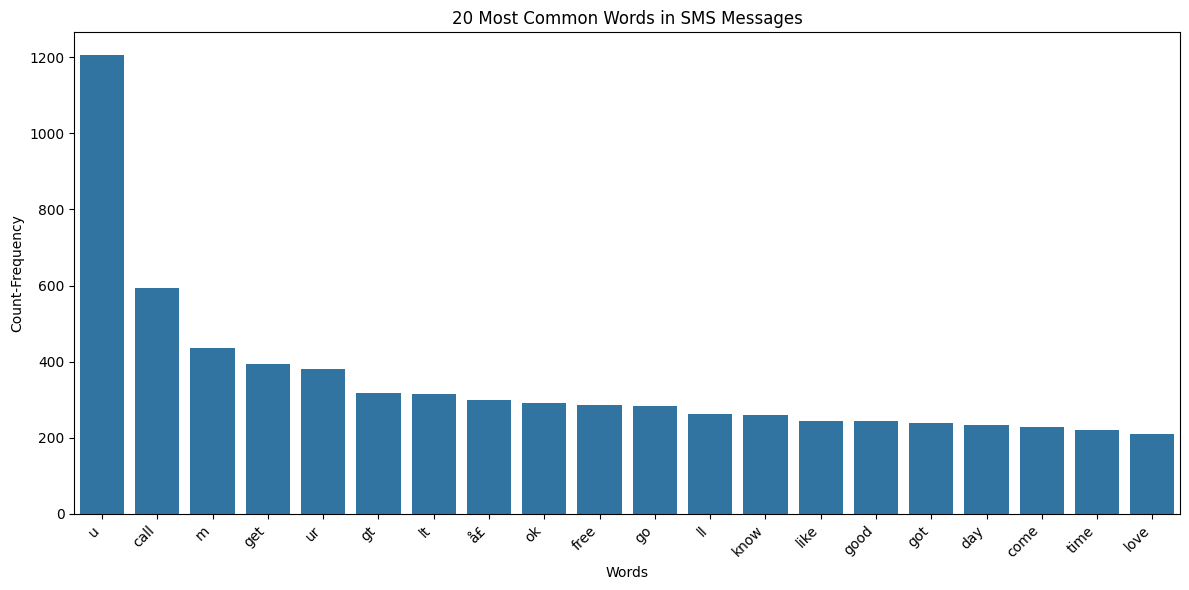

In [18]:
# en çok geçen kelimeleri görselleştirelim
plt.figure(figsize=(12,6))
common_words = dict(word_freq.most_common(20))
sns.barplot(x=list(common_words.keys()), y=list(common_words.values()))

plt.title("20 Most Common Words in SMS Messages")
plt.xlabel("Words")
plt.ylabel("Count-Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

df.iterrows() ifadesiyle, padnas DataFrame'deki her satırı tek tek döner. i: satırın indexi, row: satırdaki verilerin tamamı. row["label"] o satırdaki label sütununda spam mı ham mı kontrolü için label sütununu kontrol eder.

In [19]:
spam_words = []
ham_words = []

for i, row in df.iterrows():
    if row["label"] == "spam":
        spam_words.extend(row["filtered_tokens"])
    else:
        ham_words.extend(row["filtered_tokens"])

spam_word_freq = Counter(spam_words)
ham_word_freq = Counter(ham_words)

print("\nMost common words in SPAM messages")
print(spam_word_freq.most_common(20))

print("\nMost common words in HAM messages")
print(ham_word_freq.most_common(20))


Most common words in SPAM messages
[('call', 357), ('å£', 294), ('free', 226), ('u', 181), ('txt', 170), ('p', 159), ('ur', 144), ('mobile', 128), ('text', 126), ('stop', 122), ('claim', 113), ('reply', 104), ('www', 98), ('prize', 93), ('get', 86), ('cash', 76), ('won', 76), ('uk', 73), ('nokia', 71), ('send', 70)]

Most common words in HAM messages
[('u', 1024), ('m', 401), ('gt', 318), ('lt', 316), ('get', 308), ('ok', 287), ('ll', 259), ('go', 252), ('ur', 237), ('know', 236), ('call', 236), ('good', 233), ('like', 232), ('got', 231), ('come', 227), ('day', 209), ('time', 201), ('love', 199), ('going', 169), ('one', 167)]


Bag of Words Hakkında
= Bag of Words used to convert words in a text into a matrix representation by extracting its features, it shows us which word occurs in a sentence and its frequency, for use in modeling such as machine learning algorithms.

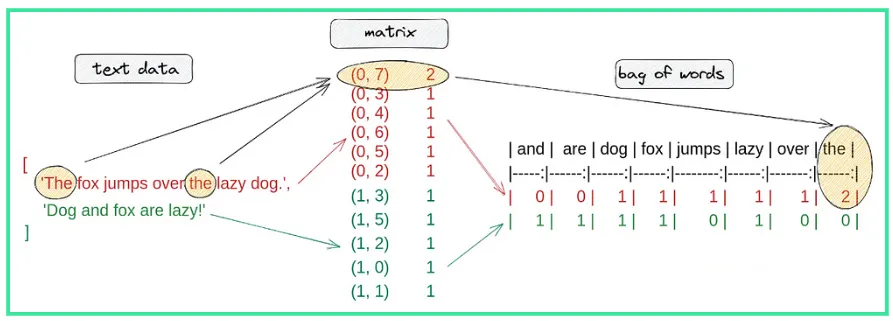

Yani kısaca bir mesajdaki kelimeleri (tokens), bir sözlük (vocabulary) üzerinden sayarak vector, matrix oluşturmak. Modeli artık kelimelerle değil sayılarla çalıştırırız. Her mesaj sayılardan oluşan bir yapıya çevirilir.

In [20]:
# bow = bag of words
def create_bow_vector(tokens, vocabulary):
    bow_vector = {word: 0 for word in vocabulary}
    word_counts = Counter(tokens)

    for word, count in word_counts.items():
        if word in vocabulary:
            bow_vector[word] = count
    return bow_vector

# test
sample_tokens = df["filtered_tokens"].iloc[0]
sample_bow = create_bow_vector(sample_tokens, vocabulary)

print("\nBag of Words vector example:")
print("Original tokens: ", sample_tokens)
print("Resulting vector (showing non-zero entries):")
non_zero = {word: count for word, count in sample_bow.items() if count > 0}
print(non_zero)


Bag of Words vector example:
Original tokens:  ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
Resulting vector (showing non-zero entries):
{'world': 1, 'point': 1, 'crazy': 1, 'got': 1, 'available': 1, 'amore': 1, 'e': 1, 'great': 1, 'n': 1, 'bugis': 1, 'jurong': 1, 'cine': 1, 'go': 1, 'la': 1, 'wat': 1, 'buffet': 1}


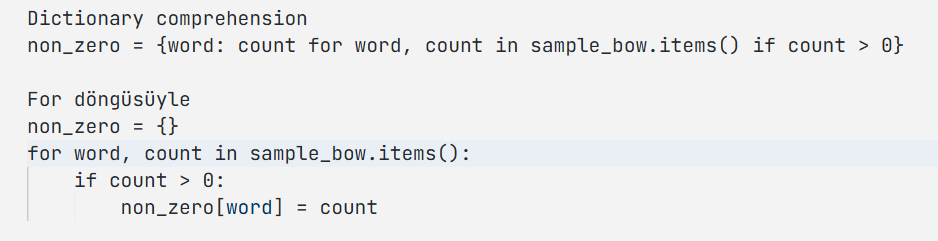

PHASE 3: NAIVE BAYES IMPLEMENTATION

In [21]:
# Hazır makine öğrenimi algoritması olmadan sıfır yazılmış kod.

class MultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha # smoothing parameter
        self.class_priors = {} # prior probabilities P(class)
        self.word_probs = {} # conditional probabilities P(word|class)
        self.classes = None # list of unique classes
        self.vocabulary = None # set of all unique words

    def fit(self, X_train, y_train):
        n_samples = len(y_train)
        self.classes = np.unique(y_train)

        self.calculate_priors(y_train)

        self.vocabulary = set()
        for bow_vector in X_train:
            self.vocabulary.update(bow_vector.keys())

        self.calculate_word_probabilities(X_train, y_train)

        return self
    
    def calculate_priors(self, y_train):
        n_samples = len(y_train)
        class_counts = Counter(y_train)

        for cls in self.classes:
            self.class_priors[cls] = class_counts[cls] / n_samples
        
    def calculate_word_probabilities(self, X_train, y_train):
        word_counts = {cls: defaultdict(int) for cls in self.classes}
        total_counts = {cls: 0 for cls in self.classes}

        for i, bow_vector in enumerate(X_train):
            cls = y_train[i]
            for word, count in bow_vector.items():
                word_counts[cls][word] += count
                total_counts[cls] += count
        
        self.word_probs = {cls: {} for cls in self.classes}

        vocab_size = len(self.vocabulary)

        for cls in self.classes:
            denominator = total_counts[cls] + self.alpha * vocab_size
            
            for word in self.vocabulary:
                numerator = word_counts[cls].get(word, 0) + self.alpha
                self.word_probs[cls][word] = numerator / denominator
    
    def predict_proba(self, X_test):
        if not self.word_probs:
            raise ValueError("Model not fitted. Call 'fit' first.")
        
        all_probs = []
        
        for bow_vector in X_test:
            log_probs = {cls: np.log(prior) for cls, prior in self.class_priors.items()}

            for word, count in bow_vector.items():
                if word in self.vocabulary:  # Only consider words in training vocabulary
                    for cls in self.classes:
                        log_probs[cls] += count * np.log(self.word_probs[cls][word])
            
            max_log_prob = max(log_probs.values())

            probs = {}
            total_prob = 0
            for cls, log_prob in log_probs.items():
                probs[cls] = np.exp(log_prob - max_log_prob)
                total_prob += probs[cls]
            
            for cls in probs:
                probs[cls] /= total_prob if total_prob > 0 else 1
            
            all_probs.append(probs)
        
        return all_probs
    
    def predict(self, X_test):
        all_probs = self.predict_proba(X_test)
        
        predictions = []
        for probs in all_probs:
            predictions.append(max(probs, key=probs.get))
        
        return predictions
    


In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# BOW vektörleri
X = [create_bow_vector(tokens, vocabulary) for tokens in df["filtered_tokens"]]
y = df["label"].tolist()

vec = DictVectorizer()
X_vectorized = vec.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.9721973094170404

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       965
        spam       0.87      0.93      0.90       150

    accuracy                           0.97      1115
   macro avg       0.93      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [23]:
test_msg = "Congratulations! You won a free ticket to Bahamas. Text WIN to 12345 now."
test_tokens = remove_stopwords(tokenize_text(test_msg))
test_bow = create_bow_vector(test_tokens, vocabulary)
test_vector = vec.transform([test_bow])

print("\nPredicted label:", model.predict(test_vector)[0])
print("Probabilities:", model.predict_proba(test_vector)[0])



Predicted label: spam
Probabilities: [3.12090234e-05 9.99968791e-01]
